In [25]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Read csv 
csv_file_path = 'Resources/Unemployment rate (%).csv'
unemployment_df = pd.read_csv(csv_file_path)
unemployment_df

,ref_area.label,indicator.label,source.label,sex.label,classif1.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
0,Afghanistan,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Total,"Age (Youth, adults): 15+",2021,5.58,NaN,NaN,Unemployment definition: Two criteria (not in ...,Repository: ILO-STATISTICS - Micro data proces...
1,Afghanistan,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Total,"Age (Youth, adults): 15-24",2021,8.71,NaN,NaN,Unemployment definition: Two criteria (not in ...,Repository: ILO-STATISTICS - Micro data proces...
2,Afghanistan,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Total,"Age (Youth, adults): 25+",2021,4.41,NaN,NaN,Unemployment definition: Two criteria (not in ...,Repository: ILO-STATISTICS - Micro data proces...
3,Afghanistan,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Male,"Age (Youth, adults): 15+",2021,5.60,NaN,NaN,Unemployment definition: Two criteria (not in ...,Repository: ILO-STATISTICS - Micro data proces...
4,Afghanistan,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Male,"Age (Youth, adults): 15-24",2021,8.45,NaN,NaN,Unemployment definition: Two criteria (not in ...,Repository: ILO-STATISTICS - Micro data proces...
...,...,...,...,...,...,...,...,...,...,...,...
11391,Zimbabwe,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Male,"Age (Youth, adults): 15-24",2014,5.93,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
11392,Zimbabwe,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Male,"Age (Youth, adults): 25+",2014,3.65,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
11393,Zimbabwe,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Female,"Age (Youth, adults): 15+",2014,5.18,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
11394,Zimbabwe,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Female,"Age (Youth, adults): 15-24",2014,7.81,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...


In [27]:
# Drop unnecessary columns 
columns_to_drop = ['indicator.label','source.label', 'obs_status.label','note_classif.label','note_indicator.label','note_source.label' ]
unemployment_df = unemployment_df.drop(columns=columns_to_drop)
unemployment_df.head()

,ref_area.label,sex.label,classif1.label,time,obs_value
0,Afghanistan,Sex: Total,"Age (Youth, adults): 15+",2021,5.58
1,Afghanistan,Sex: Total,"Age (Youth, adults): 15-24",2021,8.71
2,Afghanistan,Sex: Total,"Age (Youth, adults): 25+",2021,4.41
3,Afghanistan,Sex: Male,"Age (Youth, adults): 15+",2021,5.60
4,Afghanistan,Sex: Male,"Age (Youth, adults): 15-24",2021,8.45


In [28]:
# Rename columns 
new_column_names = {'ref_area.label': 'country', 'sex.label': 'gender', 'classif1.label':'age_group', 'time':'year','obs_value':'unemployment_rate'}
unemployment_df.rename(columns=new_column_names, inplace=True)
unemployment_df.head()



,country,gender,age_group,year,unemployment_rate
0,Afghanistan,Sex: Total,"Age (Youth, adults): 15+",2021,5.58
1,Afghanistan,Sex: Total,"Age (Youth, adults): 15-24",2021,8.71
2,Afghanistan,Sex: Total,"Age (Youth, adults): 25+",2021,4.41
3,Afghanistan,Sex: Male,"Age (Youth, adults): 15+",2021,5.60
4,Afghanistan,Sex: Male,"Age (Youth, adults): 15-24",2021,8.45


In [29]:
# Drop 'Sex:Total' from gender column, this project only compareing the unemployment rate by gender 
unemployment_df = unemployment_df[unemployment_df['gender'] != 'Sex: Total']
unemployment_df

,country,gender,age_group,year,unemployment_rate
3,Afghanistan,Sex: Male,"Age (Youth, adults): 15+",2021,5.60
4,Afghanistan,Sex: Male,"Age (Youth, adults): 15-24",2021,8.45
5,Afghanistan,Sex: Male,"Age (Youth, adults): 25+",2021,4.60
6,Afghanistan,Sex: Female,"Age (Youth, adults): 15+",2021,5.50
7,Afghanistan,Sex: Female,"Age (Youth, adults): 15-24",2021,9.41
...,...,...,...,...,...
11391,Zimbabwe,Sex: Male,"Age (Youth, adults): 15-24",2014,5.93
11392,Zimbabwe,Sex: Male,"Age (Youth, adults): 25+",2014,3.65
11393,Zimbabwe,Sex: Female,"Age (Youth, adults): 15+",2014,5.18
11394,Zimbabwe,Sex: Female,"Age (Youth, adults): 15-24",2014,7.81


In [30]:
# Simplify 'gender' column : keep the format as 'male', 'female'
unemployment_df['gender'] = unemployment_df['gender'].str.replace('Sex: ', '')
unemployment_df.head()

,country,gender,age_group,year,unemployment_rate
3,Afghanistan,Male,"Age (Youth, adults): 15+",2021,5.60
4,Afghanistan,Male,"Age (Youth, adults): 15-24",2021,8.45
5,Afghanistan,Male,"Age (Youth, adults): 25+",2021,4.60
6,Afghanistan,Female,"Age (Youth, adults): 15+",2021,5.50
7,Afghanistan,Female,"Age (Youth, adults): 15-24",2021,9.41


In [31]:
# Drop 'Sex:Other' from gender column
unemployment_df = unemployment_df[unemployment_df['gender'] != 'Sex: Other']
unemployment_df

,country,gender,age_group,year,unemployment_rate
3,Afghanistan,Male,"Age (Youth, adults): 15+",2021,5.60
4,Afghanistan,Male,"Age (Youth, adults): 15-24",2021,8.45
5,Afghanistan,Male,"Age (Youth, adults): 25+",2021,4.60
6,Afghanistan,Female,"Age (Youth, adults): 15+",2021,5.50
7,Afghanistan,Female,"Age (Youth, adults): 15-24",2021,9.41
...,...,...,...,...,...
11391,Zimbabwe,Male,"Age (Youth, adults): 15-24",2014,5.93
11392,Zimbabwe,Male,"Age (Youth, adults): 25+",2014,3.65
11393,Zimbabwe,Female,"Age (Youth, adults): 15+",2014,5.18
11394,Zimbabwe,Female,"Age (Youth, adults): 15-24",2014,7.81


In [32]:
# Simplify 'age_group' column : extract the number 
unemployment_df['age_group'] = unemployment_df['age_group'].str.extract(r'(\d{2}\+|\d{2}-\d{2})')
unemployment_df.head()

,country,gender,age_group,year,unemployment_rate
3,Afghanistan,Male,15+,2021,5.60
4,Afghanistan,Male,15-24,2021,8.45
5,Afghanistan,Male,25+,2021,4.60
6,Afghanistan,Female,15+,2021,5.50
7,Afghanistan,Female,15-24,2021,9.41


In [40]:
# Remove non-country data 

non_countries = ['World', 'World: Low income','World: Lower-middle income', 'World: Upper-middle income','World: High income', 'Africa', 'Arab States','Asia and the Pacific', 'Europe and Central Asia', 'Americas'\
                 'Netherlands Antilles', 'Hong Kong, China', 'Macau, China', 'Curaçao', 'Cayman Islands', 'Falkland Islands (Malvinas)', 'Cook Islands', 'Niue', 'Taiwan, China', 'Occupied Palestinian Territory' \
                    ]
unemployment_df = unemployment_df[~unemployment_df['country'].isin(non_countries)]


In [42]:
# Get the unique country 
unique_country = unemployment_df['country'].unique()
unique_country
len(unique_country)

185

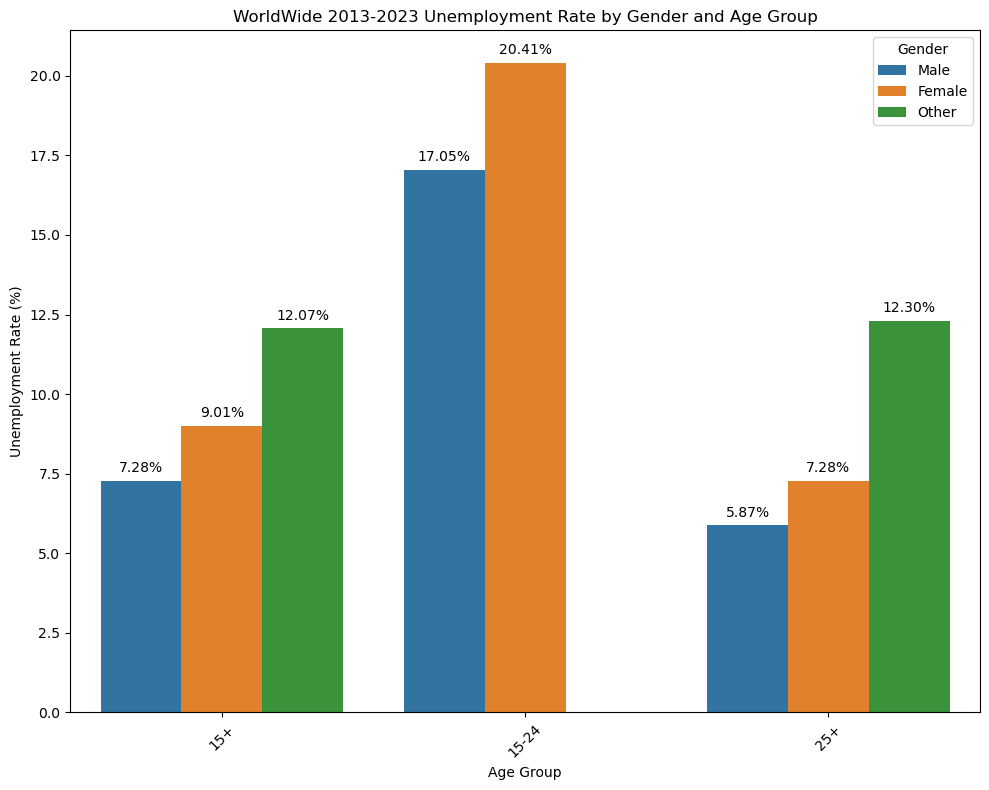

In [35]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='age_group', y='unemployment_rate', hue='gender', data=unemployment_df, ci=None)

# Adding the text annotations on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')
    
plt.title('WorldWide 2013-2023 Unemployment Rate by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

In [38]:
unemployment_df.to_csv('unemployment_cleaned.csv', index=False)
